<a href="https://colab.research.google.com/github/Audspods/PalmerPenguinAnalysis/blob/main/Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIC16A Group Project

## Contributions Statement

## 1. Data Import

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("palmer_penguins.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'palmer_penguins.csv'

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

def clean_data(df, categories, numeric, dropped_columns=[]):
    # Drop specified columns
    if dropped_columns:
        df = df.drop(dropped_columns, axis=1)

    label_encoders = {}
    for cat in categories:
        le = LabelEncoder()
        df[cat] = le.fit_transform(df[cat].astype(str))
        label_encoders[cat] = le

    # Impute missing values for numerical features
    imputer_numeric = SimpleImputer(strategy='mean')
    df[numeric] = imputer_numeric.fit_transform(df[numeric])

    return df, label_encoders

train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=42)
categories = ['Species','Region','Island', 'Stage', 'Clutch Completion', 'Date Egg', 'Sex']
numerical_features = ["Culmen Length (mm)", "Culmen Depth (mm)", 'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

train_data = clean_data(train_data, categories,numerical_features)
test_data = clean_data(test_data, categories, numerical_features)

print(train_data.head())
print(test_data.head())

    studyName  Sample Number  Species  Region  Island  Stage Individual ID  \
66    PAL0809             67        0       0       0      0         N30A1   
229   PAL0708             10        2       0       0      0         N35A2   
7     PAL0708              8        0       0       2      0          N4A2   
140   PAL0910            141        0       0       1      0         N80A1   
323   PAL0910            104        2       0       0      0         N23A2   

     Clutch Completion  Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
66                   1        41                35.5               16.2   
229                  1        33                46.8               15.4   
7                    0        12                39.2               19.6   
140                  1        11                40.2               17.1   
323                  1        19                49.1               15.0   

     Flipper Length (mm)  Body Mass (g)  Sex  Delta 15 N (o/oo)  \
66           

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 66 to 102
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            275 non-null    object 
 1   Sample Number        275 non-null    int64  
 2   Species              275 non-null    int32  
 3   Region               275 non-null    int32  
 4   Island               275 non-null    int32  
 5   Stage                275 non-null    int32  
 6   Individual ID        275 non-null    object 
 7   Clutch Completion    275 non-null    int32  
 8   Date Egg             275 non-null    int32  
 9   Culmen Length (mm)   275 non-null    float64
 10  Culmen Depth (mm)    275 non-null    float64
 11  Flipper Length (mm)  275 non-null    float64
 12  Body Mass (g)        275 non-null    float64
 13  Sex                  275 non-null    int32  
 14  Delta 15 N (o/oo)    275 non-null    float64
 15  Delta 13 C (o/oo)    275 non-null    fl

## 2. Exploratory Analysis

In [ ]:
# displayed table

import pandas as pd

def penguin_summary_table(group_cols, value_cols):
    # Load penguins dataset
    penguins_df = pd.read_csv("palmer_penguins.csv")

    # Group by specified columns and calculate mean
    summary_table = penguins_df.groupby(group_cols)[value_cols].mean()
    summary_table = summary_table.round(2)

    return summary_table
numerical_features = ["Culmen Length (mm)", "Culmen Depth (mm)", 'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

summary = penguin_summary_table(["Species"],numerical_features )
print(summary)

                                           Culmen Length (mm)  \
Species                                                         
Adelie Penguin (Pygoscelis adeliae)                     38.79   
Chinstrap penguin (Pygoscelis antarctica)               48.83   
Gentoo penguin (Pygoscelis papua)                       47.50   

                                           Culmen Depth (mm)  \
Species                                                        
Adelie Penguin (Pygoscelis adeliae)                    18.35   
Chinstrap penguin (Pygoscelis antarctica)              18.42   
Gentoo penguin (Pygoscelis papua)                      14.98   

                                           Flipper Length (mm)  Body Mass (g)  \
Species                                                                         
Adelie Penguin (Pygoscelis adeliae)                     189.95        3700.66   
Chinstrap penguin (Pygoscelis antarctica)               195.82        3733.09   
Gentoo penguin (Pygoscelis pa

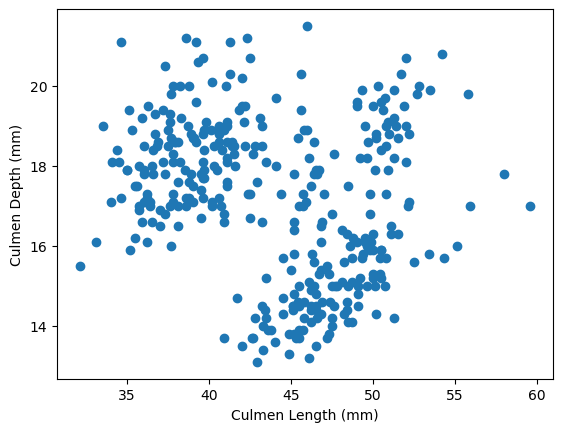

In [ ]:
# scatterplot

import matplotlib.pyplot as plt

x = penguins['Culmen Length (mm)']
y = penguins['Culmen Depth (mm)']

fig, ax = plt.subplots()
ax.scatter(x, y)

ax.set_xlabel('Culmen Length (mm)')
ax.set_ylabel('Culmen Depth (mm)')

plt.show()

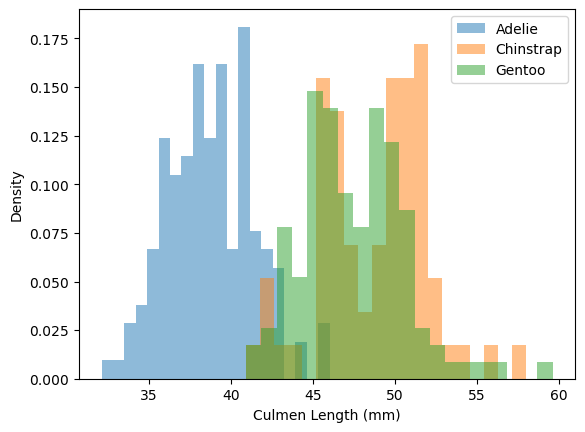

In [ ]:
# histogram

species_set = set(penguins['Species'])

# Create a new figure and axis
fig, ax = plt.subplots()

# Iterate over each species
for species in species_set:
    species_culmen_lengths = penguins[penguins['Species'] == species]['Culmen Length (mm)']
    ax.hist(species_culmen_lengths, bins=20, label=species.split()[0], alpha=0.5, density=True)

ax.set_xlabel('Culmen Length (mm)')
ax.set_ylabel('Density')
ax.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

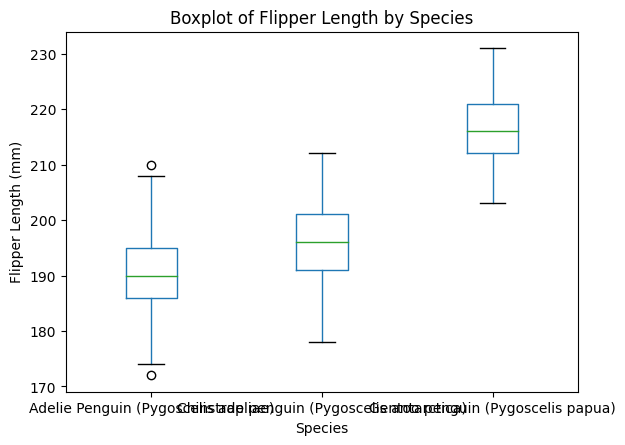

In [ ]:
# boxplot

penguins = penguins.dropna(subset=['Species', 'Flipper Length (mm)'])

# Create a boxplot for flipper length by species
plt.figure(figsize=(10, 6))
penguins.boxplot(column='Flipper Length (mm)', by='Species', grid=False)
plt.title('Boxplot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

## 3. Feature Selection

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

penguins = penguins[penguins['Sex'] != '..']

penguins = penguins.dropna()

recode_sex = {
'MALE': 0,
'FEMALE': 1,
0:0,
1:1}
penguins['Sex'] = penguins['Sex'].replace(r'^\s*$', pd.NA, regex=True)
penguins = penguins.dropna(subset=['Sex'])
penguins['Sex'] = penguins['Sex'].map(recode_sex)

recode_species = {
'Adelie Penguin (Pygoscelis adeliae)': 0,
'Gentoo penguin (Pygoscelis papua)': 1,
'Chinstrap penguin (Pygoscelis antarctica)': 2,
0:0,
1:1,
2:2}
penguins['Species'] = penguins['Species'].map(recode_species)
recode_island = {
'Biscoe': 0,
'Dream':1,
'Torgersen':2,
0:0,
1:1,
2:2}

print(penguins.head())

   studyName  Sample Number  Species  Region     Island               Stage  \
6    PAL0708              7        0  Anvers  Torgersen  Adult, 1 Egg Stage   
7    PAL0708              8        0  Anvers  Torgersen  Adult, 1 Egg Stage   
28   PAL0708             29        0  Anvers     Biscoe  Adult, 1 Egg Stage   
29   PAL0708             30        0  Anvers     Biscoe  Adult, 1 Egg Stage   
38   PAL0708             39        0  Anvers      Dream  Adult, 1 Egg Stage   

   Individual ID Clutch Completion  Date Egg  Culmen Length (mm)  \
6           N4A1                No  11/15/07                38.9   
7           N4A2                No  11/15/07                39.2   
28         N18A1                No  11/10/07                37.9   
29         N18A2                No  11/10/07                40.5   
38         N25A1                No  11/13/07                37.6   

    Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex  \
6                17.8                181.0        

Species                1.000000
Flipper Length (mm)    0.864319
Body Mass (g)          0.763188
Culmen Length (mm)     0.722978
Date Egg               0.480645
Clutch Completion      0.079790
Sex                    0.001090
Delta 13 C (o/oo)     -0.206546
Delta 15 N (o/oo)     -0.499565
Island                -0.644574
Culmen Depth (mm)     -0.741140
Region                      NaN
Stage                       NaN
Name: Species, dtype: float64


<Figure size 1000x600 with 0 Axes>

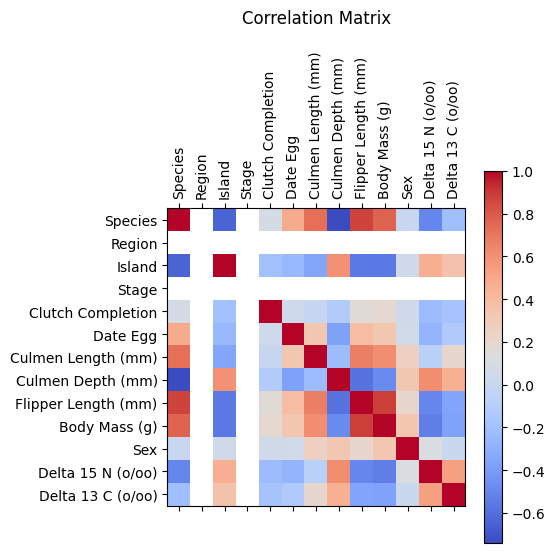

In [ ]:
correlation_matrix = train_data[['Species', 'Region', 'Island', 'Stage',
       'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].corr()
# Display the correlation with the target
print(correlation_matrix['Species'].sort_values(ascending=False))

# Plot the correlation matrix using matplotlib
plt.figure(figsize=(10, 6))
cax = plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

In [ ]:
train_data.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

Flipper length and Body Mass for Quantative and Island for Qualitative because they have the highest magnitude cof orrelation

## 4. Modeling

In [ ]:
# function to create decision region plot for each island (inputs model, outputs plot)

def plot_regions_island(c, penguins, label_encoders):
    islands = penguins["Island"].unique()
    fig, axes = plt.subplots(1, len(islands), figsize=(15, 5), sharey=True)

    for ax, island_encoded in zip(axes, islands):
        island_name = label_encoders['Island'].inverse_transform([island_encoded])[0]
        df = penguins[penguins["Island"] == island_encoded]
        x0 = df['Flipper Length (mm)']
        x1 = df['Body Mass (g)']
        y = df['Species']

        grid_x = np.linspace(x0.min(), x0.max(), 501)
        grid_y = np.linspace(x1.min(), x1.max(), 501)
        xx, yy = np.meshgrid(grid_x, grid_y)
        XX = xx.ravel()
        YY = yy.ravel()
        XY = np.c_[XX, YY]

        # Adding the island encoding to the grid points
        island_column = np.full(XY.shape[0], island_encoded)
        XY_with_island = np.c_[XY, island_column]
        XY_with_island_df = pd.DataFrame(XY_with_island, columns=['Flipper Length (mm)', 'Body Mass (g)', 'Island'])

        p = c.predict(XY_with_island_df)
        p = p.reshape(xx.shape)

        ax.contourf(xx, yy, p, cmap="jet", alpha=0.2)
        scatter = ax.scatter(x0, x1, c=y, cmap="jet", vmin=0, vmax=2)

        ax.set(xlabel="Flipper Length (mm)",
               ylabel="Body Mass (g)",
               title=island_name)

        legend1 = ax.legend(*scatter.legend_elements(), title="Species")
        ax.add_artist(legend1)

    plt.tight_layout()
    plt.show()

### Model 1: Logistic Regression

In [ ]:
X_train = train_data[['Flipper Length (mm)', 'Body Mass (g)', 'Island']].values
y_train = train_data['Species'].values
X_test = test_data[['Flipper Length (mm)', 'Body Mass (g)', 'Island']].values
y_test = test_data['Species'].values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(y_pred)

[1 0 2 0 2 2 2 1 0 2 2 1 0 1 2 0 1 2 2 0 1 0 2 0 0 0 2 0 1 0 0 0 1 0 0 0 2
 0 0 1 2 2 2 0 0 2 2 0 0 1 0 2 2 0 0 0 0 0 0 2 1 2 2 0 2 0 0 0 0]


/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


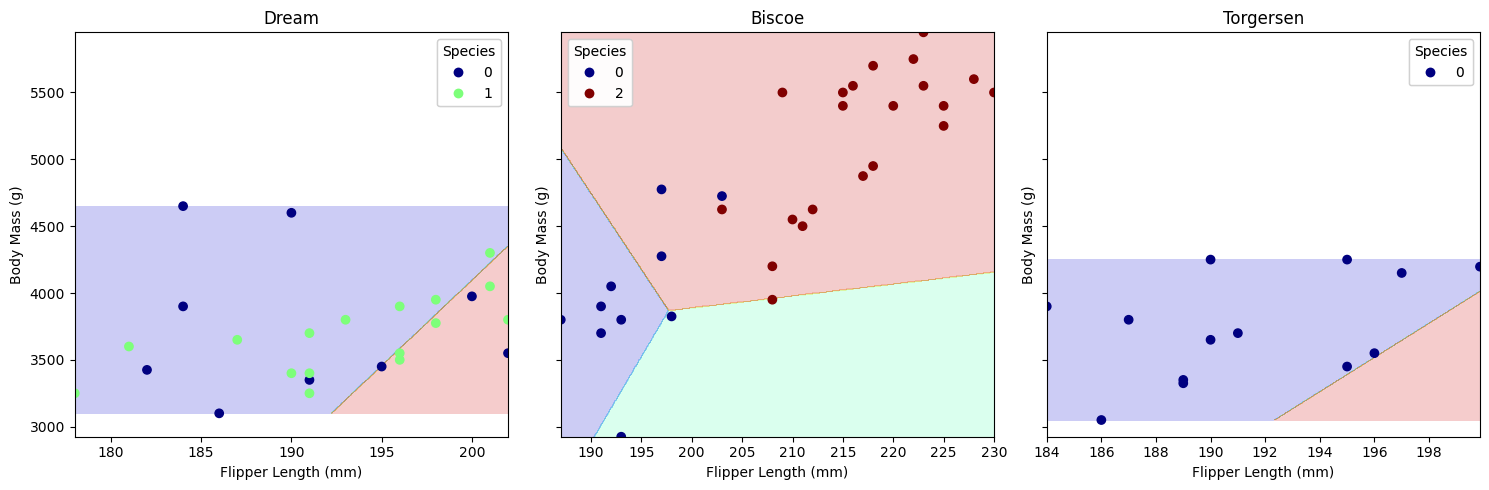

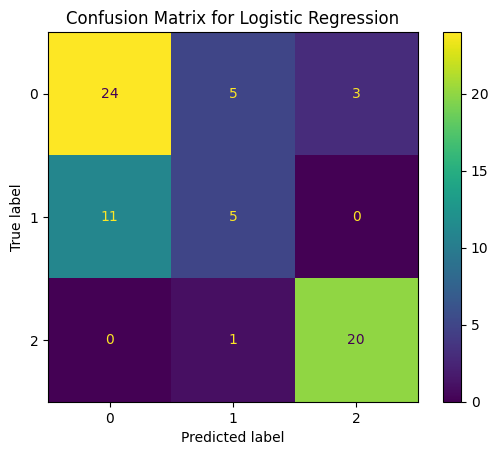

[1.00000000e-03 5.27315789e-01 1.05363158e+00 1.57994737e+00
 2.10626316e+00 2.63257895e+00 3.15889474e+00 3.68521053e+00
 4.21152632e+00 4.73784211e+00 5.26415789e+00 5.79047368e+00
 6.31678947e+00 6.84310526e+00 7.36942105e+00 7.89573684e+00
 8.42205263e+00 8.94836842e+00 9.47468421e+00 1.00010000e+01]


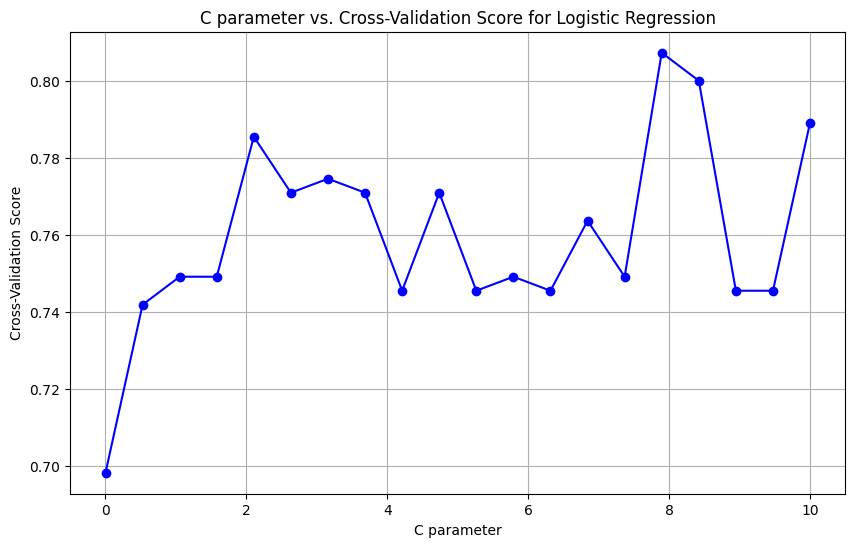

Best cross-validation score: 0.8072727272727273
Optimal C depth: 7.895736842105263


In [ ]:
# decision region plot

plot_regions_island(log_reg, test_data, label_encoders)

# confusion matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# log reg model
best_score = 0
best_C = 0

C_parameter = np.linspace(0.001,10.001,20)
print(C_parameter)
cv_scores = []

for cs in C_parameter:

    model = LogisticRegression(C = cs, max_iter = 1000)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)

    if mean_score > best_score:
        best_score = mean_score
        best_C = cs

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(C_parameter, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('C parameter')
plt.ylabel('Cross-Validation Score')
plt.title('C parameter vs. Cross-Validation Score for Logistic Regression')
plt.grid(True)
plt.show()

print(f"Best cross-validation score: {best_score}")
print(f"Optimal C depth: {best_C}")

### Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(y_pred)

[1 1 2 0 2 2 2 2 0 2 2 0 0 1 2 0 0 2 2 0 1 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 2
 0 0 1 2 2 2 0 0 2 2 0 0 1 0 2 2 0 0 0 0 0 1 2 1 0 2 0 2 0 0 0 0]


/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


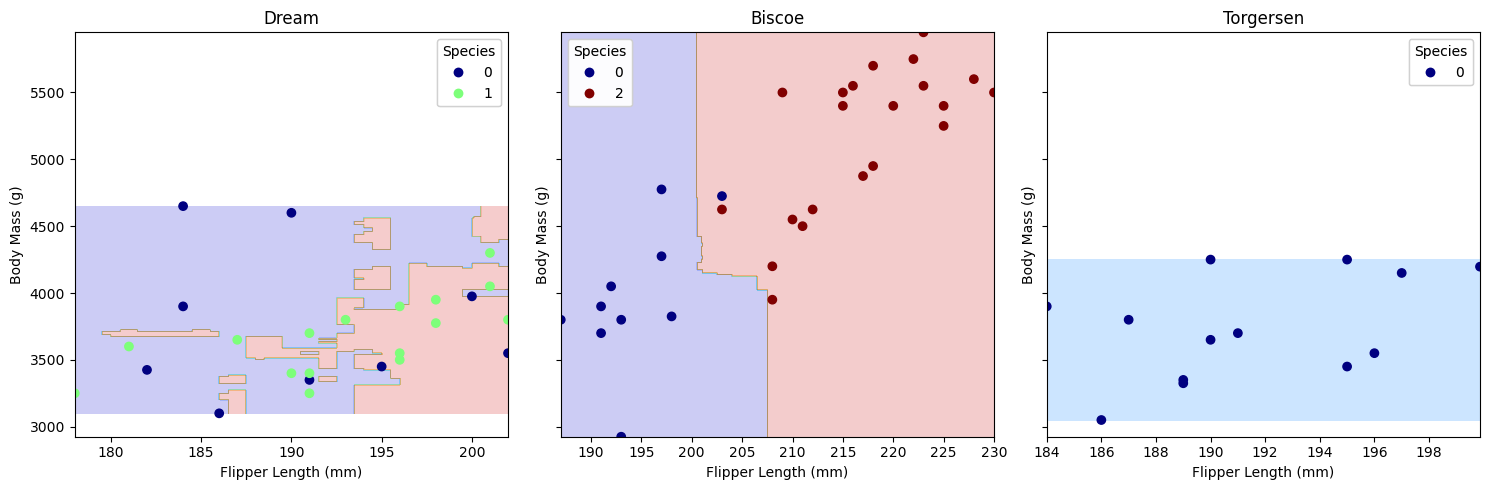

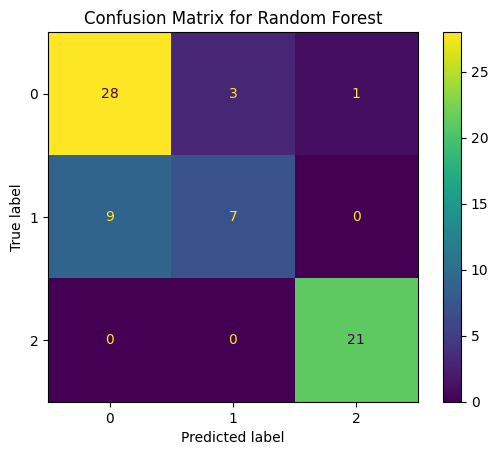

[ 20  29  38  48  57  67  76  86  95 105 114 124 133 143 152 162 171 181
 190 200]


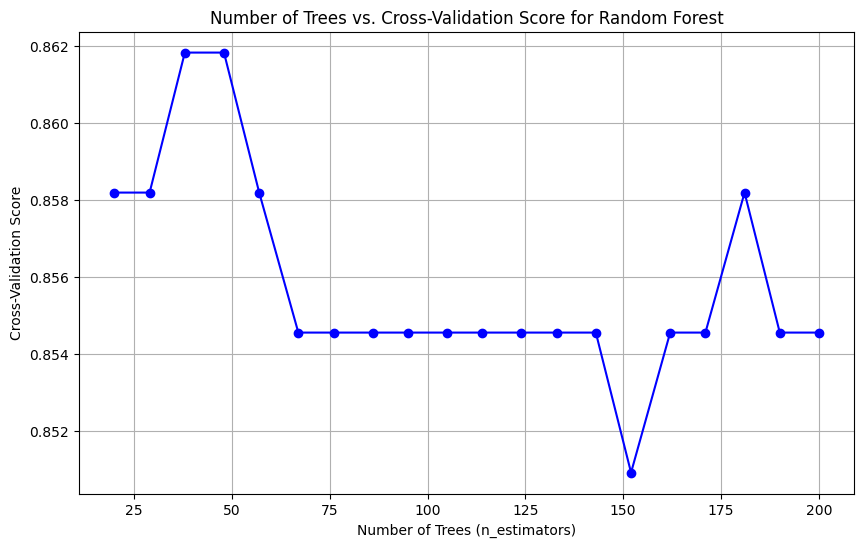

Best cross-validation score: 0.8618181818181819
Optimal number of trees: 38


In [ ]:
from sklearn.ensemble import RandomForestClassifier

plot_regions_island(rf_model, test_data, label_encoders)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

best_score = 0
best_n_estimators = 0

n_estimators_range = np.linspace(20, 200, 20, dtype=int)
print(n_estimators_range)
cv_scores = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)

    if mean_score > best_score:
        best_score = mean_score
        best_n_estimators = n

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validation Score')
plt.title('Number of Trees vs. Cross-Validation Score for Random Forest')
plt.grid(True)
plt.show()

print(f"Best cross-validation score: {best_score}")
print(f"Optimal number of trees: {best_n_estimators}")

### Model 3: Nearest-Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 2 0 2 2 2 1 0 0 2 0 0 0 2 1 1 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0 1 0 2 0 2
 1 1 0 2 2 2 0 2 2 2 0 0 0 0 2 2 0 0 0 0 0 0 2 1 0 2 2 2 0 0 0 0]


/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


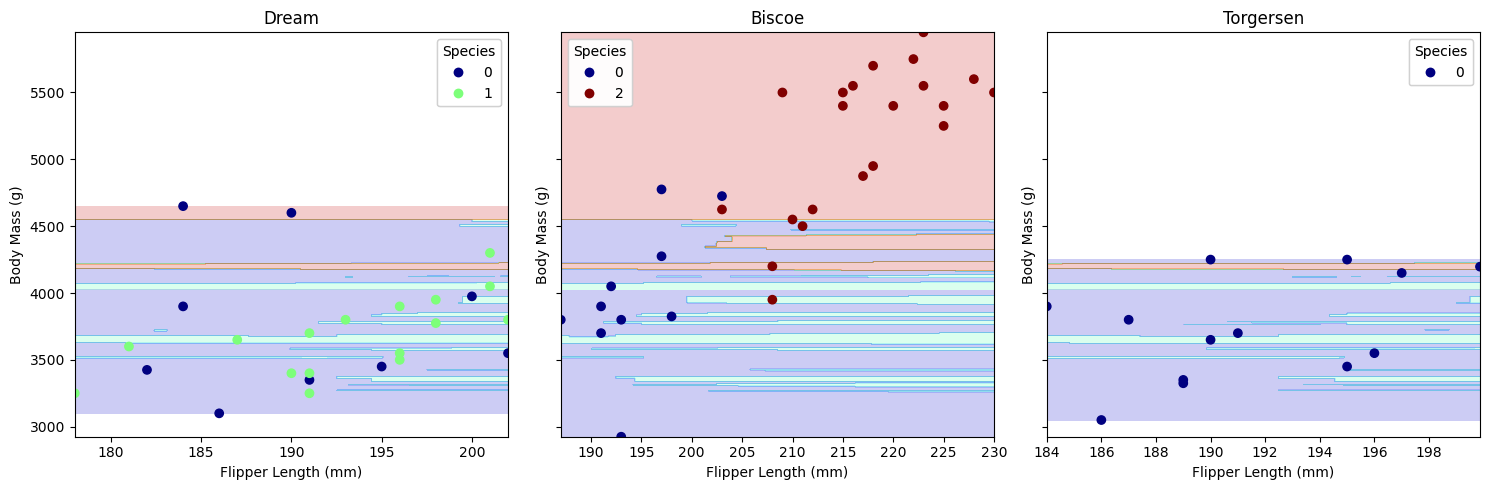

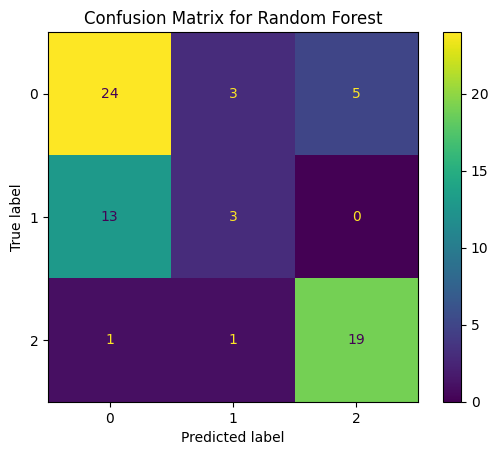

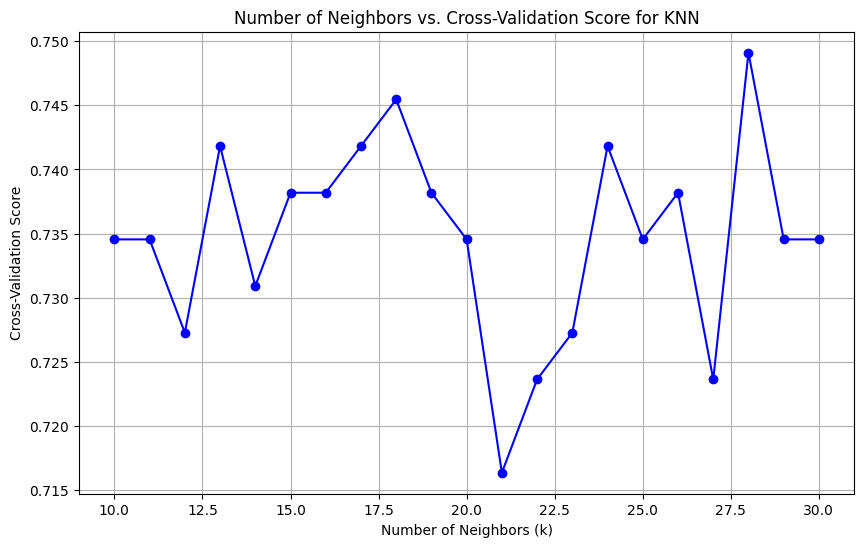

Best cross-validation score: 0.7490909090909091
Optimal number of neighbors: 28


In [ ]:
# decision region plot

plot_regions_island(knn, test_data, label_encoders)

# confusion matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()


# nearest neighbor model

best_score = 0
best_k = 0

k_range = range(10, 31)
cv_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)

    if mean_score > best_score:
        best_score = mean_score
        best_k = k

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Score')
plt.title('Number of Neighbors vs. Cross-Validation Score for KNN')
plt.grid(True)
plt.show()

print(f"Best cross-validation score: {best_score}")
print(f"Optimal number of neighbors: {best_k}")

# Discussion:

1. LogReg:
   Best cross-validation score: 0.8072727272727273
   Optimal C depth: 7.895736842105263.
This model works best for linear relationships and simple feature interactions. In this scenario, it seems to have worked decently well.
   
3. RandomForest
   Best cross-validation score: 0.8618181818181819
   Optimal number of trees: 38.
This model has the highest cross-validation score. It has the most flexible boundaries, but can overfit training data, especially when the dataset is small.
   
5. Nearest Neighbor
   Best cross-validation score: 0.7490909090909091
   Optimal number of neighbors: 28.
This model is the most sensitive to feature scaling and k. Because the classes overlapped, it did not perform very well.

With an larger datasetsize, RandomForest and KNeighbors would be able to generalize better, which would reduce the risk of overfitting. Additionally, adding other relevant features to species classification, such as physical measurements, could also improve model performance.